In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind




In [12]:
# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_data.csv')  # Replace 'cleaned_data.csv' with the actual filename

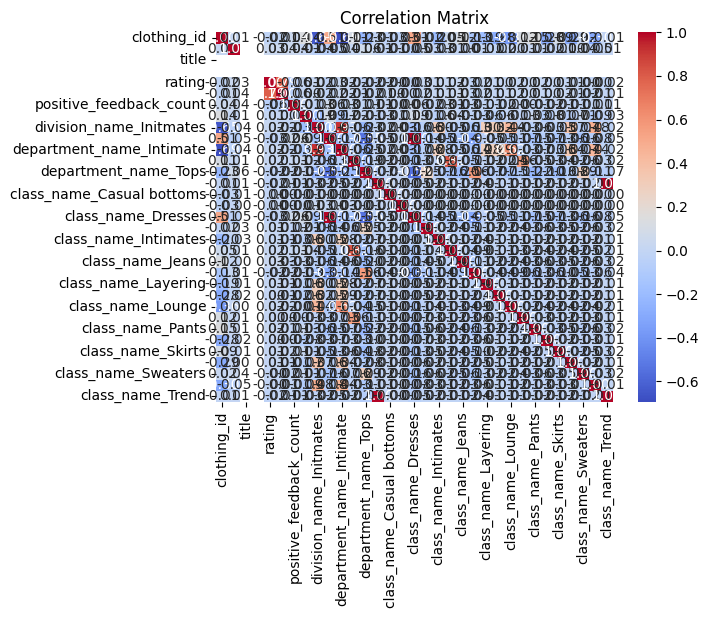

In [14]:
# Correlation Analysis
df_encoded = pd.get_dummies(df, columns=['division_name', 'department_name', 'class_name'], drop_first=True)
df_encoded.drop(['title', 'review_text'], axis=1)
numeric_columns = df_encoded.columns
df_encoded[numeric_columns] = df_encoded[numeric_columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
df_encoded.corr()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name_General Petite,division_name_Initmates,department_name_Dresses,...,class_name_Legwear,class_name_Lounge,class_name_Outerwear,class_name_Pants,class_name_Shorts,class_name_Skirts,class_name_Sleep,class_name_Sweaters,class_name_Swim,class_name_Trend
clothing_id,1.000000,0.013409,NaN,NaN,-0.015009,-0.013884,0.041881,0.137613,-0.649471,0.508146,...,-0.284424,-0.364275,0.115700,0.145021,-0.282839,0.086983,-0.289553,0.018730,-0.302269,-0.005001
age,0.013409,1.000000,NaN,NaN,0.034725,0.035287,0.041217,0.005922,-0.038889,-0.053239,...,-0.016255,0.001723,0.008022,0.014852,-0.021101,-0.006342,0.002530,0.040040,-0.050931,0.006563
title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,-0.015009,0.034725,NaN,NaN,1.000000,0.793174,-0.056821,0.008462,0.018365,-0.025708,...,0.002775,0.016991,0.001304,0.022046,0.003299,0.011317,0.006365,-0.004311,-0.003328,-0.021537
recommended_ind,-0.013884,0.035287,NaN,NaN,0.793174,1.000000,-0.059557,0.004599,0.019499,-0.023988,...,0.006164,0.017464,0.001176,0.014696,0.003743,0.015812,0.007907,-0.015143,-0.007358,-0.011753
positive_feedback_count,0.041881,0.041217,NaN,NaN,-0.056821,-0.059557,1.000000,0.006895,-0.029930,0.055808,...,-0.016211,-0.004956,0.002500,-0.009790,-0.016733,-0.006336,-0.013988,-0.014754,-0.007609,0.006675
division_name_General Petite,0.137613,0.005922,NaN,NaN,0.008462,0.004599,0.006895,1.000000,-0.186393,0.085398,...,-0.059352,-0.006191,-0.026866,0.027467,-0.083893,0.010194,-0.068478,0.011274,-0.089133,-0.025976
division_name_Initmates,-0.649471,-0.038889,NaN,NaN,0.018365,0.019499,-0.029930,-0.186393,1.000000,-0.157551,...,0.318424,0.438801,-0.030949,-0.064268,-0.029754,-0.052795,0.367387,-0.066049,0.478202,-0.019013
department_name_Dresses,0.508146,-0.053239,NaN,NaN,-0.025708,-0.023988,0.055808,0.085398,-0.157551,1.000000,...,-0.050168,-0.106225,-0.073760,-0.153168,-0.070912,-0.125825,-0.057882,-0.157413,-0.075341,-0.045312


from this correlation matrix appears that a strong positive correlation (0.793174), indicating a strong positive relationship between the product rating and whether it is recommended, which is quiet expected

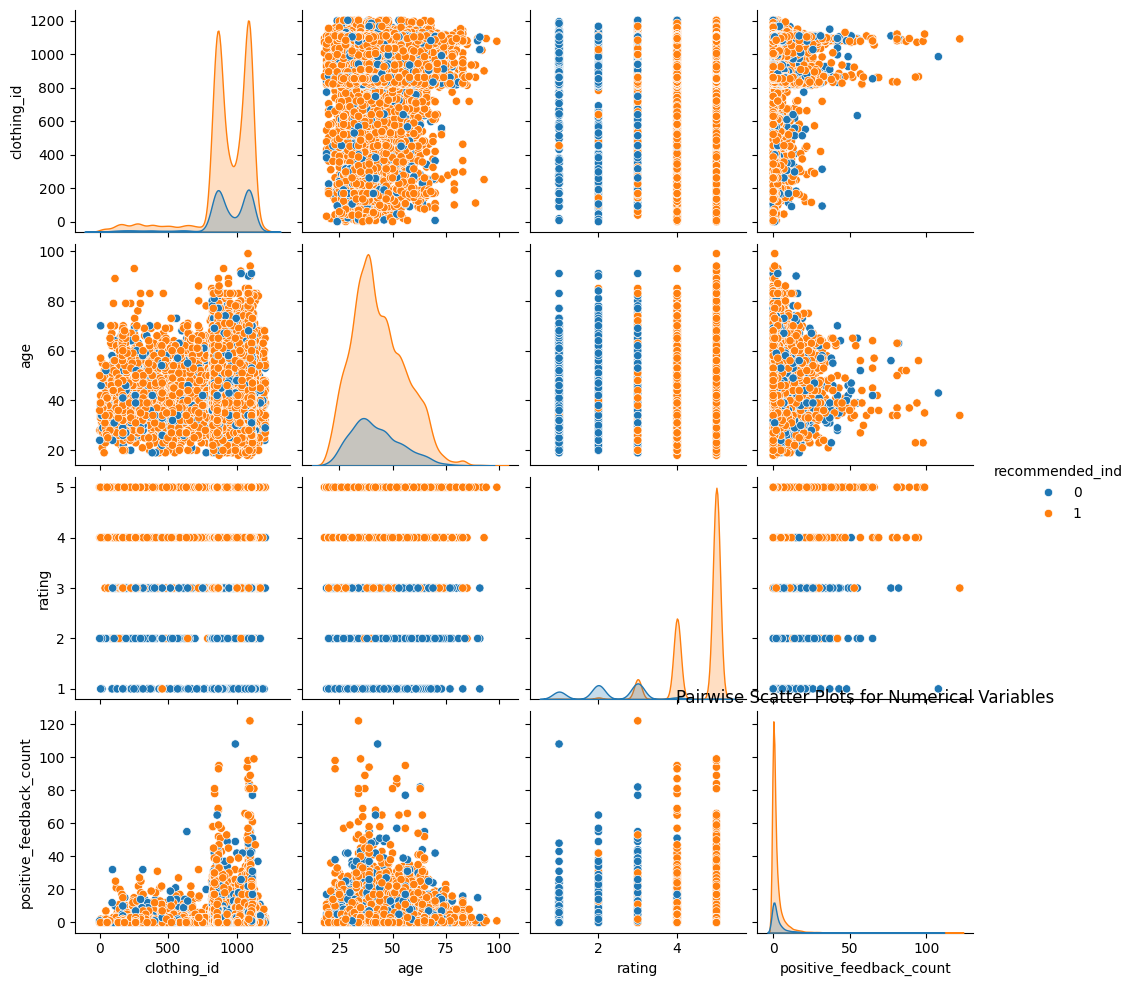

In [17]:
# Pairwise Scatter Plots for Numerical Variables
sns.pairplot(df, hue='recommended_ind')
plt.title('Pairwise Scatter Plots for Numerical Variables')
plt.show()



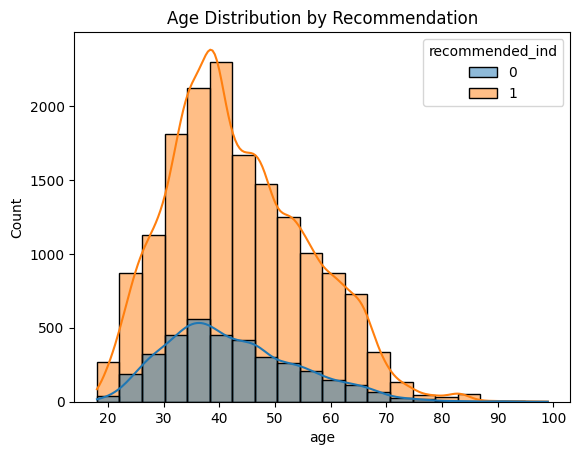

In [18]:
# Age Distribution by Recommendation
sns.histplot(x='age', hue='recommended_ind', data=df, bins=20, kde=True)
plt.title('Age Distribution by Recommendation')
plt.show()



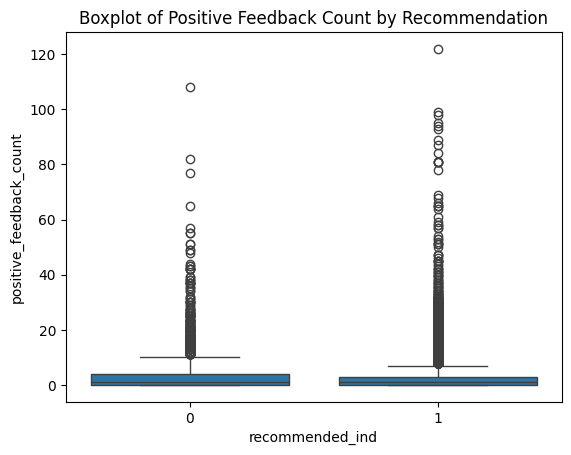

In [19]:
# Boxplot of Positive Feedback Count by Recommendation
sns.boxplot(x='recommended_ind', y='positive_feedback_count', data=df)
plt.title('Boxplot of Positive Feedback Count by Recommendation')
plt.show()



In [22]:
# T-test for Age between Recommended and Not Recommended Products
recommended_age = df[df['recommended_ind'] == 1]['age']
not_recommended_age = df[df['recommended_ind'] == 0]['age']
t_stat, p_value = ttest_ind(recommended_age, not_recommended_age)
print(f'T-test for Age between Recommended and Not Recommended Products:\n'
      f'T-statistic: {t_stat}\n'
      f'P-value: {p_value}')



T-test for Age between Recommended and Not Recommended Products:
T-statistic: 4.952385839604979
P-value: 7.391645373208568e-07


### T-statistic (4.952385839604979):

The t-statistic is a measure of how many standard deviations the sample mean is from the null hypothesis mean. In this case, a positive t-statistic suggests that the mean age of the recommended products group is higher than the mean age of the not recommended products group.

### P-value (7.391645373208568e-07):

The p-value is the probability of observing a t-statistic as extreme as the one computed from the sample, assuming that the null hypothesis is true. In this case, the extremely small p-value (close to zero) suggests strong evidence against the null hypothesis.

### Interpretation:

Since the p-value is less than the conventional significance level (e.g., 0.05), I would reject the null hypothesis. In practical terms, this means that there is strong evidence to suggest that there is a statistically significant difference in the mean age between customers who recommend products and those who do not recommend products.

### Conclusion:

Based on the T-test, I can conclude that there is a significant association between the recommendation status of a product and the age of the customers. The positive t-statistic indicates that, on average, customers who recommend products tend to be older than those who do not recommend products.

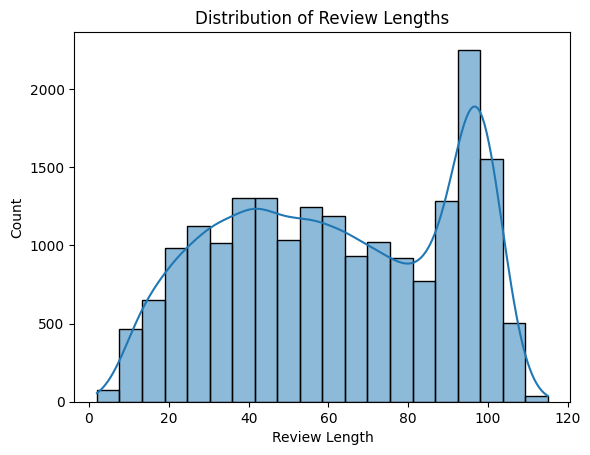

In [23]:
# Visualizing Distribution of Review Lengths
df['review_length'] = df['review_text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()



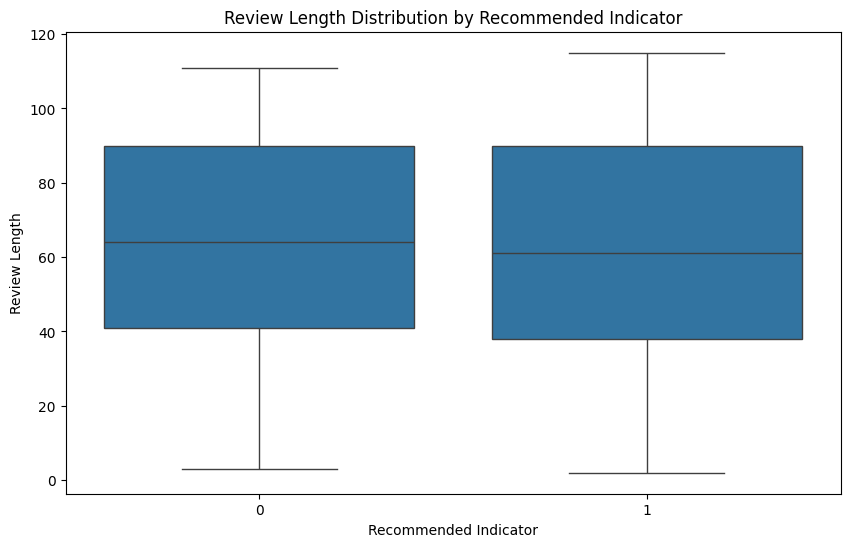

In [25]:
# Box Plot or Violin Plot for Review Length by Recommended Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x='recommended_ind', y='review_length', data=df)
plt.title('Review Length Distribution by Recommended Indicator')
plt.xlabel('Recommended Indicator')
plt.ylabel('Review Length')
plt.show()

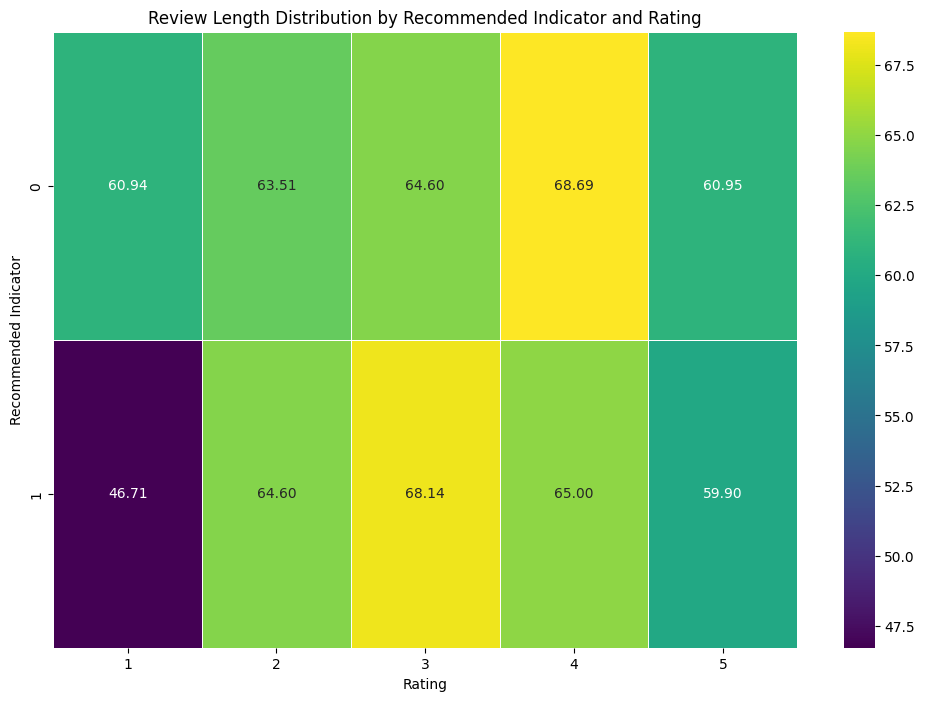

In [26]:
# Box Plot or Violin Plot for Review Length by Recommended Indicator and Rating
plt.figure(figsize=(12, 8))
sns.heatmap(df.groupby(['recommended_ind', 'rating'])['review_length'].mean().unstack(), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Review Length Distribution by Recommended Indicator and Rating')
plt.xlabel('Rating')
plt.ylabel('Recommended Indicator')
plt.show()

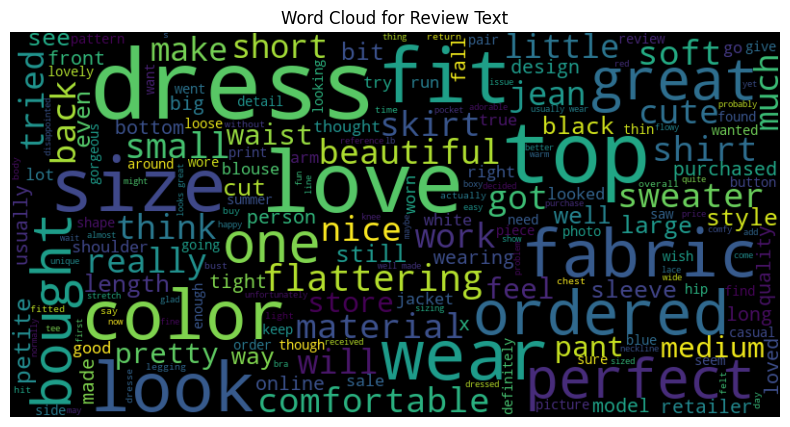

In [24]:
# Word Cloud for Review Text
from wordcloud import WordCloud

text_corpus = ' '.join(df['review_text'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100).generate(text_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Text')
plt.show()